<a href="https://colab.research.google.com/github/afrah1994/Prediction-of-Housing-Prices/blob/master/Model_selection_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting the dataset into training and validation set

For the sake of simpliticity I decided to delete the address column (Last column) from my csv file so I don't have to keep dropping the column everytime.  

In [0]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing_project.csv to USA_Housing_project.csv


In [0]:
import pandas as pd
data = pd.read_csv('USA_Housing_project.csv', delimiter=',')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [0]:
import numpy as np
dataset = np.genfromtxt('USA_Housing_project.csv', delimiter=",", skip_header = True) 

In [0]:
import random
np.random.shuffle(dataset)

I decided to do a 70%-30% split.

In [0]:
# Index for 30%
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID = dataset[:index_30percent, [0,1,2,3,4]]
YVALID = dataset[:index_30percent, 5]
XTRAIN = dataset[index_30percent:, [0,1,2,3,4]]
YTRAIN = dataset[index_30percent:, 5]
#print(XVALID)

1500


In [0]:
#Applying mean and std from xtrain to xvalid
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std

XVALID -= mean
XVALID /= std

In [0]:
# Rescaling
#Ymax = YTRAIN.max()
#YTRAIN = YTRAIN/ Ymax
YTRAIN1 = np.log(YTRAIN)
YTRAIN2 = np.log(YTRAIN)
YTRAIN3 = np.log(YTRAIN)
YTRAIN4 = np.log(YTRAIN)
YTRAIN5 = np.log(YTRAIN)
YTRAIN6 = np.log(YTRAIN)
YTRAIN7 = np.log(YTRAIN)
YTRAIN8 = np.log(YTRAIN)
YTRAIN9 = np.log(YTRAIN)
YTRAIN10 = np.log(YTRAIN)

In [0]:
# Rescaling Y Valid
#YVALID /= Ymax
YVALID1 = np.log(YVALID)
YVALID2 = np.log(YVALID)
YVALID3 = np.log(YVALID)
YVALID4 = np.log(YVALID)
YVALID5 = np.log(YVALID)
YVALID6 = np.log(YVALID)
YVALID7 = np.log(YVALID)
YVALID8 = np.log(YVALID)
YVALID9 = np.log(YVALID)
YVALID10 = np.log(YVALID)

In [0]:
print(YTRAIN)
print(YVALID)

[14.155146   14.25540077 13.99987397 ... 13.89622717 14.01962743
 14.20510844]
[14.18781735 14.13775022 14.35822482 ... 13.45222284 13.89541857
 13.70323965]


In [0]:

t=YTRAIN.mean()
ttemp=math.exp(t)
print(ttemp)

1168362.850785694


# Comparing neural network models with a linear regression and logistic regression models

## Logistic regression

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim =5, activation='sigmoid'))

In [0]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
h=model.fit(XTRAIN, YTRAIN1,validation_data=(XVALID, YVALID1), epochs = 500, batch_size=100, verbose = 1)

Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 181.6570 - mae: 13.4691 - val_loss: 181.6207 - val_mae: 13.4676
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 181.4767 - mae: 13.4624 - val_loss: 181.4512 - val_mae: 13.4614
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 181.3043 - mae: 13.4561 - val_loss: 181.2813 - val_mae: 13.4551
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 181.1314 - mae: 13.4497 - val_loss: 181.1106 - val_mae: 13.4488
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 180.9558 - mae: 13.4433 - val_loss: 180.9353 - val_mae: 13.4424
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 180.7770 - mae: 13.4367 - val_loss: 180.7566 - val_mae: 13.4359
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 180.5939 - mae: 13.4300 - val_loss: 180.5723 - val_mae: 13.4291
Epoch 8/500
35/35 [======================

In [0]:
import math
P1 = model.predict(XVALID)
YVALID1=np.exp(YVALID1)
P1=np.exp(P1)
MAE1 = abs(YVALID1 - P1)
print(MAE1)
M1=MAE1.mean()
print("M1=",M1)

[[ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]
 [ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]
 [ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]
 ...
 [ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]
 [ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]
 [ 590196.45391825 1091476.84171825 1591185.62971826 ... 1129580.11971825
  1364829.28471825  786255.06431825]]
M1= 1232766.2617315208


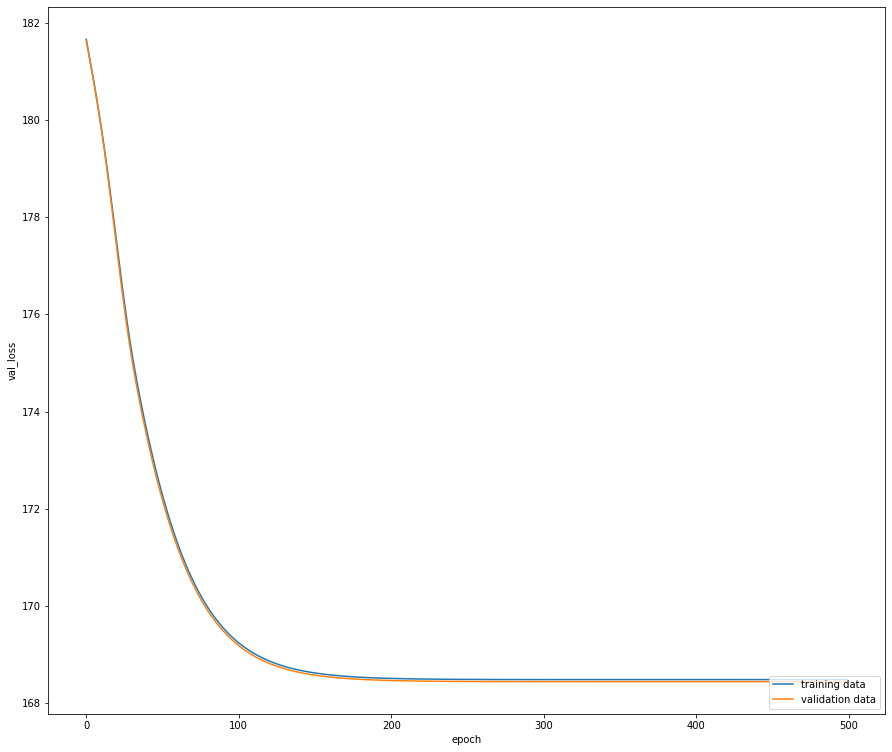

168.44471740722656

In [0]:
# Plot the learning curves (loss/accuracy/MAE)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(h.history['loss']) # replace with accuracy/MAE
plt.plot(h.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(h.history['val_loss'])


## Linear regression

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3 = Sequential()
model3.add(Dense(1,input_dim = 5, activation='linear'))

In [0]:
model3.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
h3=model3.fit(XTRAIN, YTRAIN2,validation_data=(XVALID, YVALID2), epochs = 500, batch_size=100, verbose = 1)

Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 194.9560 - mae: 13.9517 - val_loss: 194.3430 - val_mae: 13.9298
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 193.9162 - mae: 13.9150 - val_loss: 193.3492 - val_mae: 13.8947
Epoch 3/500
35/35 [==============================] - 0s 10ms/step - loss: 192.9280 - mae: 13.8799 - val_loss: 192.3622 - val_mae: 13.8596
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 191.9461 - mae: 13.8449 - val_loss: 191.3791 - val_mae: 13.8246
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 190.9678 - mae: 13.8101 - val_loss: 190.4012 - val_mae: 13.7895
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 189.9919 - mae: 13.7750 - val_loss: 189.4236 - val_mae: 13.7545
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 189.0187 - mae: 13.7402 - val_loss: 188.4511 - val_mae: 13.7195
Epoch 8/500
35/35 [=====================

In [0]:
P3 = model3.predict(XVALID)
YVALID2 = np.exp(YVALID2)
P3=np.exp(P3)

#YVALID=np.exp(YVALID)
#P3=np.exp(P3)
MAE3 = abs(YVALID2 - P3)
print(MAE3)
M2= MAE3.mean()
print("M2=",M2)


[[9.43435153e+04 4.06936873e+05 9.06645661e+05 ... 4.45040151e+05
  6.80289316e+05 1.01715095e+05]
 [5.00954578e+05 3.25810000e+02 5.00034598e+05 ... 3.84290880e+04
  2.73678253e+05 3.04895967e+05]
 [8.17619078e+05 3.16338690e+05 1.83370098e+05 ... 2.78235412e+05
  4.29862470e+04 6.21560467e+05]
 ...
 [4.99027078e+05 2.25331000e+03 5.01962098e+05 ... 4.03565880e+04
  2.75605753e+05 3.02968467e+05]
 [5.38938703e+05 3.76583150e+04 4.62050473e+05 ... 4.44963000e+02
  2.35694128e+05 3.42880092e+05]
 [1.92118265e+05 3.09162123e+05 8.08870911e+05 ... 3.47265401e+05
  5.82514566e+05 3.94034510e+03]]
M2= 420972.719445511


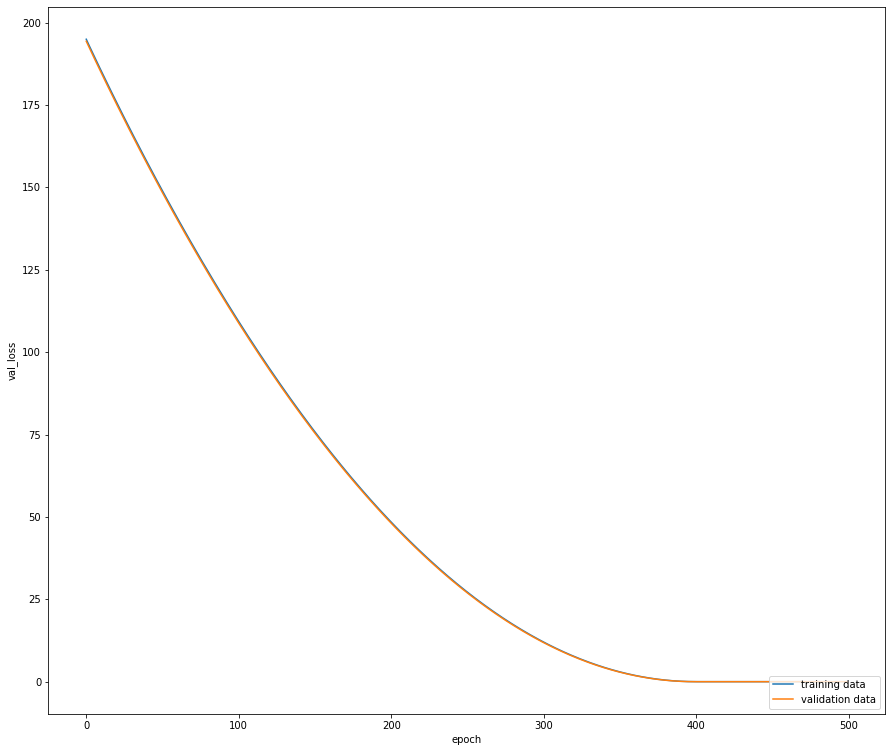

0.015223732218146324

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(h3.history['loss']) # replace with accuracy/MAE
plt.plot(h3.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(h3.history['val_loss'])

## Neural network with 3 layers (12, 8, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential()
model2.add(Dense(12,input_dim =5, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [0]:
model2.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
history2=model2.fit(XTRAIN, YTRAIN3,validation_data=(XVALID, YVALID3), epochs = 500, batch_size=100, verbose = 1)

Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 178.3523 - mae: 13.3396 - val_loss: 170.5219 - val_mae: 13.0388
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 162.1242 - mae: 12.7038 - val_loss: 153.1887 - val_mae: 12.3383
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 143.2738 - mae: 11.9138 - val_loss: 132.8579 - val_mae: 11.4519
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 121.6273 - mae: 10.9238 - val_loss: 109.9520 - val_mae: 10.3476
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 98.0316 - mae: 9.7127 - val_loss: 85.7952 - val_mae: 9.0195
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 74.0788 - mae: 8.2838 - val_loss: 62.3634 - val_mae: 7.5131
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 51.9460 - mae: 6.7160 - val_loss: 42.0130 - val_mae: 5.9382
Epoch 8/500
35/35 [==============================] - 

In [0]:
P2 = model2.predict(XVALID)
YVALID3=np.exp(YVALID3)
P2=np.exp(P2)
MAE2 = abs(YVALID3 - P2)
print(MAE2)
M3=MAE2.mean()
print("M3=",M3)
#M3 = math.exp(temp3)
#print(M3)

[[   9601.9847  510882.3725 1010591.1605 ...  548985.6505  784234.8155
   205660.5951]
 [ 518602.9528   17322.565   482386.223  ...   20780.713   256029.878
   322544.3424]
 [ 728405.8278  227125.44    272583.348  ...  189022.162    46227.003
   532347.2174]
 ...
 [ 469499.4528   31780.935   531489.723  ...   69884.213   305133.378
   273440.8424]
 [ 513937.8278   12657.44    487051.348  ...   25445.838   260695.003
   317879.2174]
 [ 126160.3278  375120.06    874828.848  ...  413223.338   648472.503
    69898.2826]]
M3= 397426.1049016334


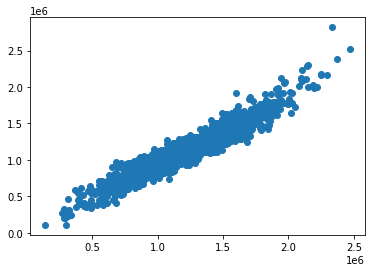

In [0]:
plt.scatter(YVALID3,P2)

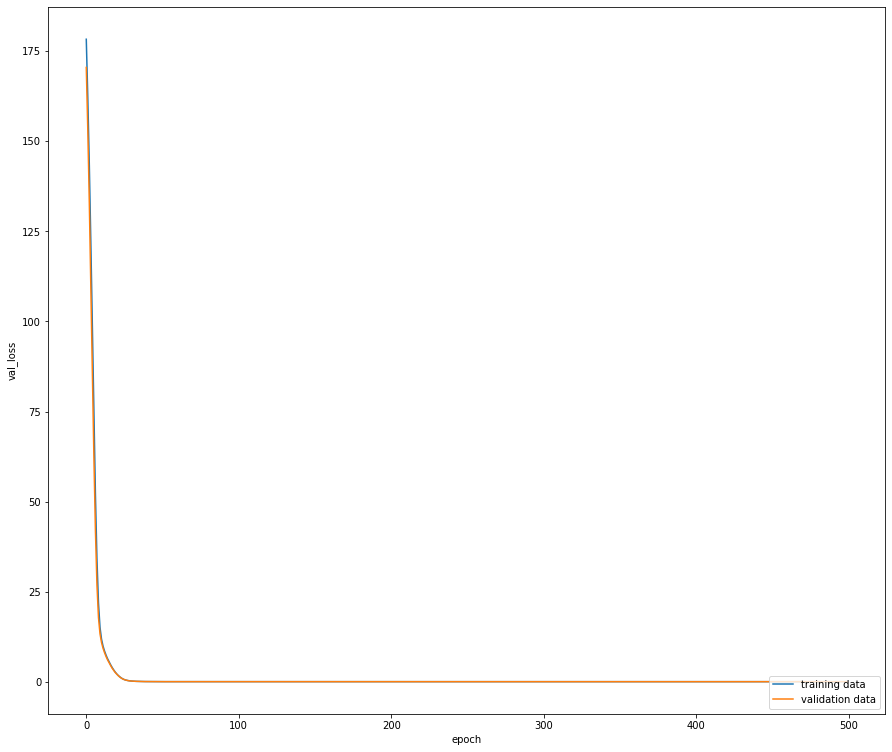

0.010386980138719082

In [0]:
# Plot the learning curves (loss/accuracy/MAE)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(history2.history['loss']) # replace with accuracy/MAE
plt.plot(history2.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(history2.history['val_loss'])

# Neural network using sigmoid in last layer

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model5 = Sequential()
model5.add(Dense(12,input_dim =5, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

In [0]:
model5.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
history5=model5.fit(XTRAIN, YTRAIN4,validation_data=(XVALID, YVALID4), epochs = 500, batch_size=100, verbose = 1)

Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 178.4574 - mae: 13.3527 - val_loss: 177.1440 - val_mae: 13.3029
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 176.1530 - mae: 13.2656 - val_loss: 175.0505 - val_mae: 13.2238
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 174.1079 - mae: 13.1884 - val_loss: 173.1101 - val_mae: 13.1505
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 172.2616 - mae: 13.1187 - val_loss: 171.4277 - val_mae: 13.0870
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 170.7699 - mae: 13.0623 - val_loss: 170.1456 - val_mae: 13.0386
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 169.7101 - mae: 13.0223 - val_loss: 169.2941 - val_mae: 13.0065
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 169.0707 - mae: 12.9980 - val_loss: 168.8251 - val_mae: 12.9887
Epoch 8/500
35/35 [======================

In [0]:
P5 = model5.predict(XVALID)
YVALID4=np.exp(YVALID4)
P2=np.exp(P2)
MAE5 = abs(YVALID4 - P5)
print(MAE5)
M4=MAE5.mean()
print("M4=",M4)


[[ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]
 [ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]
 [ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]
 ...
 [ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]
 [ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]
 [ 590198.1722 1091478.56   1591187.348  ... 1129581.838  1364831.003
   786256.7826]]
M4= 1232767.9800132667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


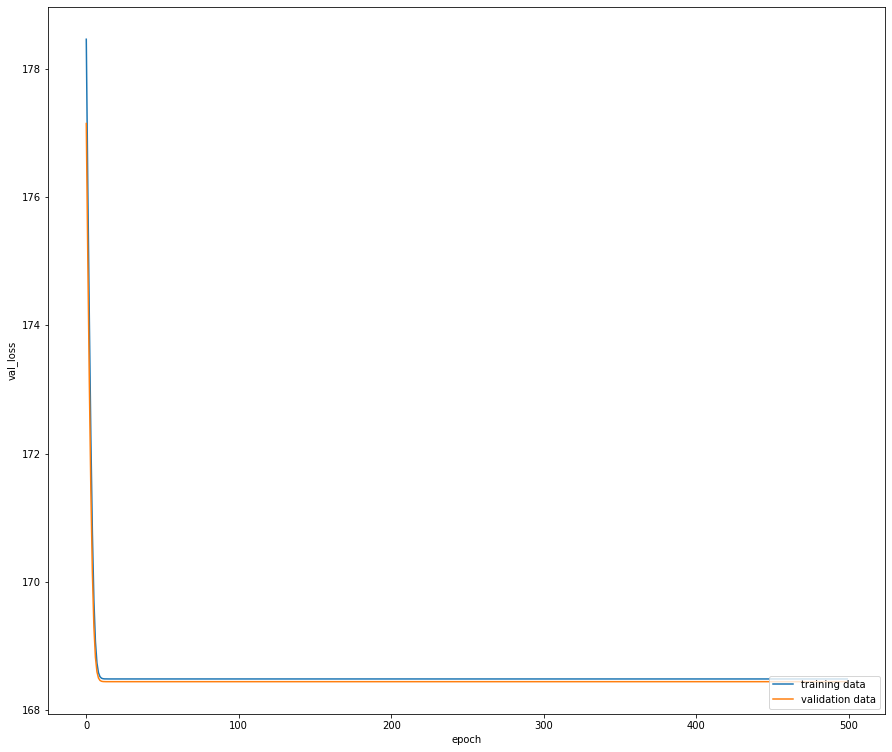

168.44471740722656

In [0]:
# Plot the learning curves (loss/accuracy/MAE)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(history5.history['loss']) # replace with accuracy/MAE
plt.plot(history5.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(history5.history['val_loss'])

# Comparing mean MAE and minimum val_loss for all the models 

Model | Mean MAE | minimum val_loss
--- | --- | ---
Logistic regression | 1232766.2617 | 168.44471740722656
   Linear regression |           420972.7194 | 0.015223732218146324
   Neural network with 3 layers (12,8,1) and last layer having linear activation|     397426.1049 | 0.010386980138719082
   Neural network with last layer having  sigmoid activation |   1232767.9800 |168.44471740722656




In [0]:
print(M1, M2, M3, M4)
min(M1,M2,M3,M4)

1232766.2617315208 420972.719445511 397426.1049016334 1232767.9800132667


397426.1049016334

As we can see from the above we get the best mean MAE when we use neural network with 3 layers that have 12, 8 and 1 neurons respectively. Linear regression gives us the second best mean MAE and logistic regression and using sigmoid in the last layer for activation gives us very bad mean MAE, this is expected because our target is a continuous variable and sigmoid is meant to be used for binary target data.

# How big the architecture needs to be to overfit the data

We are trying to find the architecture that we need to overfit our data. We do this my increasing the number of layers, increasing the number of neurons in each layer and increasing the number of epochs. We train the model on our training set and then try to predit our training set and compare which architecture gives us the highest mean MAE value. 

In [0]:
YVALID5=np.log(YVALID)
YTRAIN5=np.log(YTRAIN)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model6 = Sequential()
model6.add(Dense(256,input_dim =5, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(1, activation='linear'))

In [0]:
model6.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
history6=model6.fit(XTRAIN, YTRAIN5,validation_data=(XVALID, YVALID5), epochs = 1000, batch_size=100, verbose = 1)

Epoch 1/1000
35/35 [==============================] - 0s 12ms/step - loss: 27.8294 - mae: 4.0248 - val_loss: 12.2148 - val_mae: 2.7396
Epoch 2/1000
35/35 [==============================] - 0s 8ms/step - loss: 9.6629 - mae: 2.5085 - val_loss: 10.3300 - val_mae: 2.7694
Epoch 3/1000
35/35 [==============================] - 0s 7ms/step - loss: 7.4389 - mae: 2.2413 - val_loss: 4.8599 - val_mae: 1.7398
Epoch 4/1000
35/35 [==============================] - 0s 8ms/step - loss: 4.9457 - mae: 1.8794 - val_loss: 4.3584 - val_mae: 1.8804
Epoch 5/1000
35/35 [==============================] - 0s 8ms/step - loss: 3.6919 - mae: 1.6675 - val_loss: 2.4520 - val_mae: 1.2483
Epoch 6/1000
35/35 [==============================] - 0s 7ms/step - loss: 3.0983 - mae: 1.5843 - val_loss: 3.2330 - val_mae: 1.7256
Epoch 7/1000
35/35 [==============================] - 0s 7ms/step - loss: 2.7226 - mae: 1.5310 - val_loss: 1.8859 - val_mae: 1.2417
Epoch 8/1000
35/35 [==============================] - 0s 8ms/step - loss

In [0]:
P6 = model6.predict(XTRAIN)
YTRAIN5=np.exp(YTRAIN5)
P6=np.exp(P6)
MAE6 = abs(YTRAIN5 - P6)
print(MAE6)
M5=MAE6.mean()
print("M5=",M5)

[[ 157176.07    398206.452   835365.6624 ...  904924.31   1049976.2278
   638857.219 ]
 [ 178704.805    62325.577   499484.7874 ...  569043.435   714095.3528
   302976.344 ]
 [ 444065.18    203034.798   234124.4124 ...  303683.06    448734.9778
    37615.969 ]
 ...
 [ 693668.7425  452638.3605   15479.1501 ...   54079.4975  199131.4153
   211987.5935]
 [ 755663.9925  514633.6105   77474.4001 ...    7915.7525  137136.1653
   273982.8435]
 [ 421468.43    180438.048   256721.1624 ...  326279.81    471331.7278
    60212.719 ]]
M5= 419710.4214536134


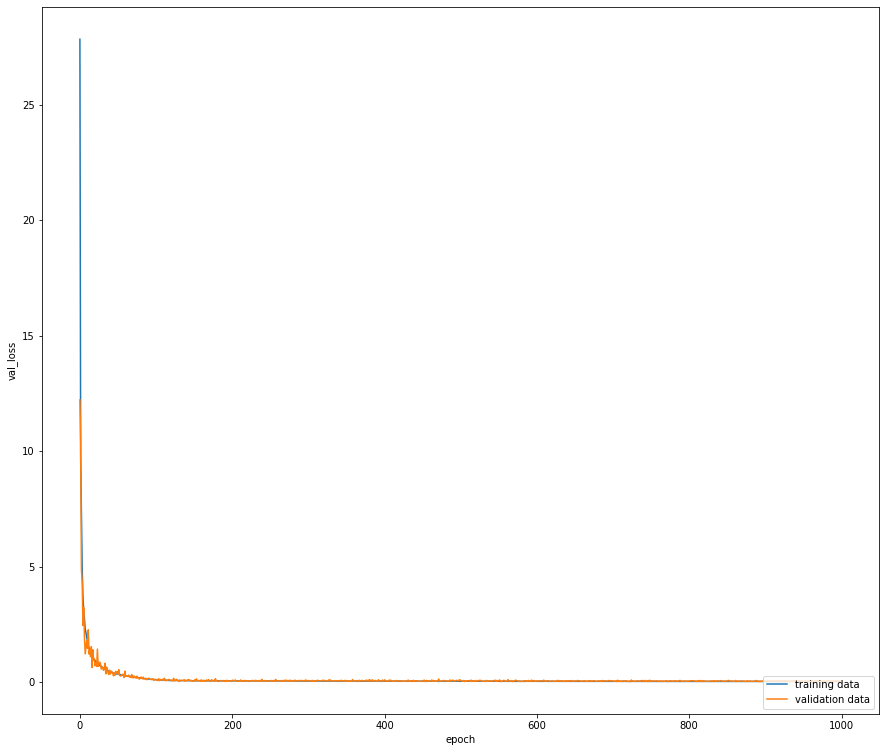

0.0183052197098732

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(history6.history['loss']) # replace with accuracy/MAE
plt.plot(history6.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(history6.history['val_loss'])

Number of layers |Number of neurons | Epochs | Mean MAE
--- | --- | --- | ---
5 | 256,256,256,256,1 | 1000 | 419710.421
6 | 256,250,150,100,50,1| 700 | 407455.452
6 | 256,250,150,100,50,1| 1000 | 383967.0292
6 | 256,250,150,100,50,1| 2000 | 415189.291
6 | 256,250,250,200,100,1 | 2000 | 379906.062
6 | 256,256,256,256,256,1 | 2000 | 385185.843
7 | 256,256,256,256,256,256,1 | 3000 | 385761.5310



In [0]:
min(419710.421,407455.452,383967.0292, 415189.291, 379906.062, 385185.843,385761.5310)

379906.062

As seen above a variety of different combinations of number of layers, number of neurons and epochs were tried to find the model with the lowest mean MAE. The architecture with 6 layers containing 256 neurons in the first five layers and 1 neuron in the last layer gave us the best mean MAE. Further increasing or decreasing the number of neurons or the epochs did not improve our mean MAE. As such when we have a lot of data (number of rows) as I do in my dataset it can be hard to overfit the data.

# Overfit architecture when we have output as an input variable

We split our dataset again but this time we add our price column as an input column as well. Our model will have 6 inputs instead of 5 now.

In [0]:
import numpy as np
dataset2 = np.genfromtxt('USA_Housing_project.csv', delimiter=",", skip_header = True) 

In [0]:
import random
np.random.shuffle(dataset2)

In [0]:
# Index for 30%
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID_d2 = dataset[:index_30percent, [0,1,2,3,4,5]]
YVALID_d2 = dataset[:index_30percent, 5]
XTRAIN_d2 = dataset[index_30percent:, [0,1,2,3,4,5]]
YTRAIN_d2 = dataset[index_30percent:, 5]
#print(XVALID)

1500


In [0]:
#Applying mean and std from xtrain to xvalid
mean = XTRAIN_d2.mean(axis = 0)
XTRAIN_d2 -= mean
std = XTRAIN_d2.std(axis = 0)
XTRAIN_d2 /= std

XVALID_d2 -= mean
XVALID_d2 /= std

In [0]:
YTRAIN_d2_1 = np.log(YTRAIN_d2)

In [0]:
YVALID_d2_1 = np.log(YVALID_d2)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model7 = Sequential()
model7.add(Dense(256,input_dim =6, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(1, activation='linear'))

In [0]:
model7.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
history7=model7.fit(XTRAIN_d2, YTRAIN_d2_1,validation_data=(XVALID_d2, YVALID_d2_1), epochs = 2000, batch_size=100, verbose = 1)

Epoch 1/2000
35/35 [==============================] - 0s 11ms/step - loss: 32.1285 - mae: 4.3271 - val_loss: 16.8121 - val_mae: 3.5171
Epoch 2/2000
35/35 [==============================] - 0s 9ms/step - loss: 12.5632 - mae: 2.9244 - val_loss: 10.8169 - val_mae: 2.6189
Epoch 3/2000
35/35 [==============================] - 0s 9ms/step - loss: 9.0519 - mae: 2.4871 - val_loss: 17.7148 - val_mae: 3.9865
Epoch 4/2000
35/35 [==============================] - 0s 10ms/step - loss: 6.9664 - mae: 2.2176 - val_loss: 4.3819 - val_mae: 1.6592
Epoch 5/2000
35/35 [==============================] - 0s 9ms/step - loss: 5.1662 - mae: 1.9689 - val_loss: 4.9977 - val_mae: 2.0955
Epoch 6/2000
35/35 [==============================] - 0s 9ms/step - loss: 4.0253 - mae: 1.8058 - val_loss: 2.6146 - val_mae: 1.3843
Epoch 7/2000
35/35 [==============================] - 0s 9ms/step - loss: 3.2725 - mae: 1.6723 - val_loss: 3.8838 - val_mae: 1.9045
Epoch 8/2000
35/35 [==============================] - 0s 10ms/step - 

In [0]:
P7 = model7.predict(XTRAIN_d2)
YTRAIN_d2_1=np.exp(YTRAIN_d2_1)
P7=np.exp(P7)
MAE7 = abs(YTRAIN_d2_1 - P7)
print(MAE7)
M6=MAE7.mean()
print("M6=",M6)

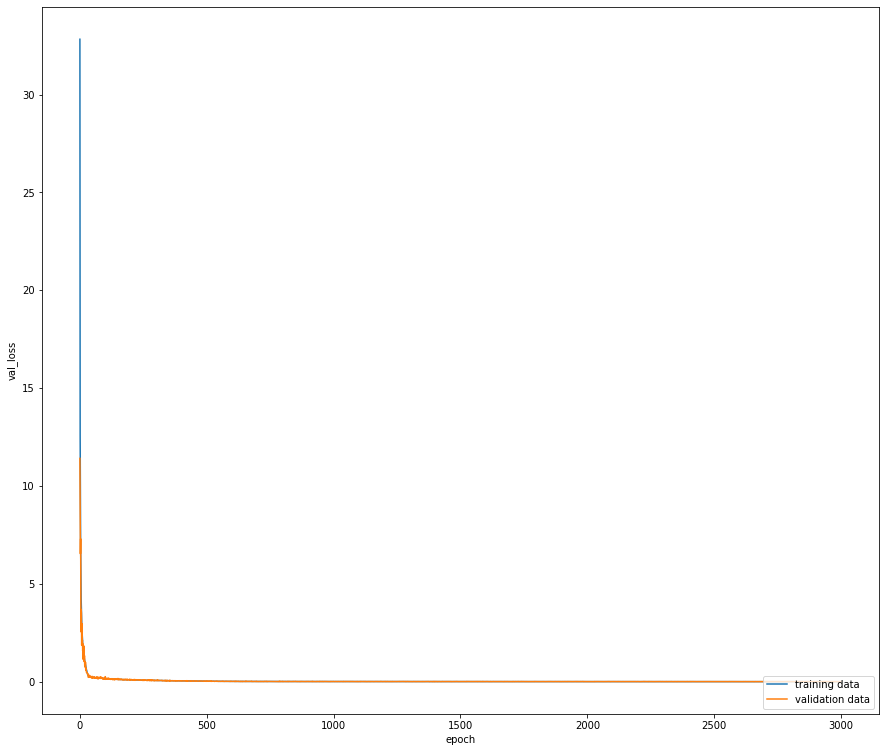

0.005372236482799053

In [0]:
#learning curves for 3000 epochs
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(history7.history['loss']) # replace with accuracy/MAE
plt.plot(history7.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(history7.history['val_loss'])

In the table below we compare the different values of mean MAE when when we have different layer models. As we can observe increasing the number of layers allowed more learning and a lower mean MAE.

Number of layers | number of neurons | epochs | mean MAE
--- | --- | --- | ---
 3 | 12,8,1 | 1000 |  400240.3264
 6| 256,256,256,256,256,1 | 2000 | 392946.3185



In the table below, We compare different models minimum val_loss when we provide output variable as input variable and when we don't. Our neural network model without output variable as the input has minimum val_loss which is much higher than our neural network model with output variable as input variable. Our learning curves is also much smoother and without fluctuations than the learning curves observed before.

Neural network | Number of layers | minimum val_loss |mean MAE
--- | --- | ---|---
Without target output as input | 6 | 0.018305  |379906.062
With target output as input | 6 | 0.005372 |345138.504


# Visualizing our neural network

The following piece of code was taken from a [stackoverflow answer](https://stackoverflow.com/questions/29888233/how-to-visualize-a-neural-network)

In [0]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer (L0)', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer (L'+str(layerType)+")", fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

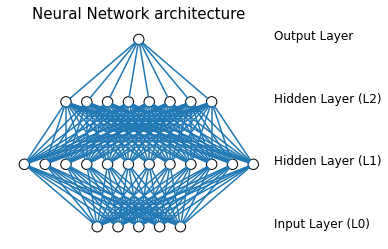

In [0]:
network = DrawNN( [5,12,8,1] )
network.draw()

Our first layer L0 that is the input layer has 5 input, 5 neurons (N0-N4)

Our second layer L1 is a hidden layer that has 12 neurons (N0-N12)

Our third layer L2 is also a hiddent layer that has 8 neurons (N0-N8)

Our output layer has 1 neuron.


#Building a function for our model

For building the function I decided to set a seed so I can reproduce the same result if I need to. We set the seed by running the bottom 4 lines.

In [0]:
from numpy.random import seed
import numpy as np
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [0]:
dataset = np.genfromtxt('USA_Housing_project.csv', delimiter=",", skip_header = True) 

In [0]:
np.random.shuffle(dataset)

In [0]:
# Index for 30%
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID_f = dataset[:index_30percent, [0,1,2,3,4]]
YVALID_f = dataset[:index_30percent, 5]
XTRAIN_f = dataset[index_30percent:, [0,1,2,3,4]]
YTRAIN_f = dataset[index_30percent:, 5]
#print(XVALID)

1500


In [0]:
#Applying mean and std from xtrain to xvalid
mean = XTRAIN_f.mean(axis = 0)
XTRAIN_f -= mean
std = XTRAIN_f.std(axis = 0)
XTRAIN_f /= std

XVALID_f -= mean
XVALID_f /= std

In [0]:
YTRAIN_f = np.log(YTRAIN_f)
YVALID_f = np.log(YVALID_f)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model9 = Sequential()
model9.add(Dense(12,input_dim =5, activation='relu'))
model9.add(Dense(8, activation='relu'))
model9.add(Dense(1, activation='linear'))

In [0]:
model9.compile(loss='mse', optimizer = 'rmsprop', metrics=['mae'])
history9=model9.fit(XTRAIN_f, YTRAIN_f,validation_data=(XVALID_f, YVALID_f), epochs = 500, batch_size=100, verbose = 1)

Epoch 1/500
35/35 [==============================] - 0s 4ms/step - loss: 199.5161 - mae: 14.1078 - val_loss: 193.2507 - val_mae: 13.8858
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 189.4739 - mae: 13.7485 - val_loss: 184.1715 - val_mae: 13.5535
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 180.4791 - mae: 13.4139 - val_loss: 174.6983 - val_mae: 13.1939
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 170.7083 - mae: 13.0371 - val_loss: 164.2665 - val_mae: 12.7822
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 159.8019 - mae: 12.5981 - val_loss: 152.5635 - val_mae: 12.2980
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 147.6794 - mae: 12.0852 - val_loss: 139.4115 - val_mae: 11.7224
Epoch 7/500
35/35 [==============================] - 0s 2ms/step - loss: 133.8056 - mae: 11.4596 - val_loss: 124.3812 - val_mae: 11.0160
Epoch 8/500
35/35 [======================

In [0]:
Prediction_by_training = model9.predict(XVALID_f)
YVALID_exp=np.exp(YVALID_f)
P9=np.exp(Prediction_by_training)
MAE9 = abs(YVALID_exp - P9)
print(MAE9)
M_f=MAE9.mean()
print("M_f=",M_f)
#M3 = math.exp(temp3)
#print(M3)

[[ 87523.808  117617.513  659711.132  ... 391463.629  398462.511
   90131.148 ]
 [115263.058   89878.263  687450.382  ... 419202.879  426201.761
   62391.898 ]
 [442167.1295 647308.4505 130020.1945 ... 138227.3085 131228.4265
  619822.0855]
 ...
 [334649.692  539791.013  237537.632  ...  30709.871   23710.989
  512304.648 ]
 [336181.817  541323.138  236005.507  ...  32241.996   25243.114
  513836.773 ]
 [317488.433  112347.112  889675.757  ... 621428.254  628427.136
  139833.477 ]]
M_f= 387731.6032675041


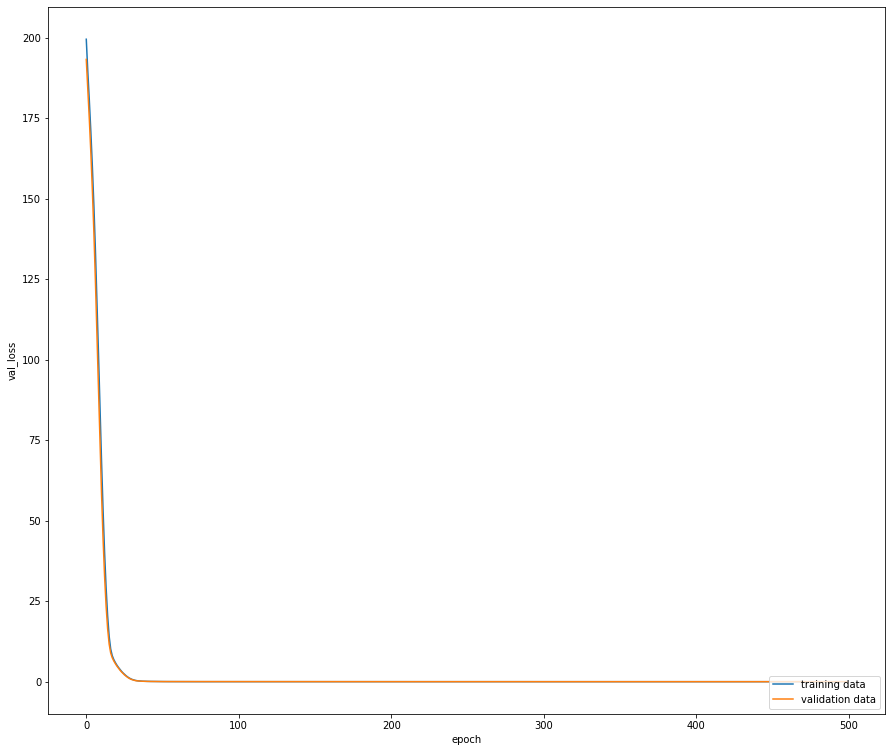

0.01409974880516529

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 13))
plt.plot(history9.history['loss']) # replace with accuracy/MAE
plt.plot(history9.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
min(history9.history['val_loss'])

In [0]:
print('Model weights - w0(slope m), bias):')
w0 = model9.layers[0].get_weights()[0][0]
b0 = model9.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[ 0.00162209  0.10702916 -0.26774508 -0.16035765  0.35236275  0.2384685
  0.17833774 -0.25553334  0.18515661  0.17232168  0.37353498 -0.1821907 ]
[ 0.5489715   0.72693896  1.2581751   1.1520798   1.0913702   1.3306127
  1.121404    0.85133547  0.86179423  1.2070845   1.0539273  -0.51312214]


The following piece of code was taken from the article "T81-558: Applications of Deep Neural Networks" by Jeff heaton that can be found at the following: [link](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_03_5_weights.ipynb)


In [0]:
for layerNum, layer in enumerate(model9.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
         print(f'B{layerNum}L{layerNum+1}N{toNeuronNum}= {bias}')
        #print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}= {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
             print(f'L{layerNum}N{fromNeuronNum}L{layerNum+1}N{toNeuronNum} = {wgt2}')
            #print(f'L{layerNum}N{fromNeuronNum} -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

B0L1N0= 0.5489714741706848
B0L1N1= 0.7269389629364014
B0L1N2= 1.2581751346588135
B0L1N3= 1.1520798206329346
B0L1N4= 1.0913702249526978
B0L1N5= 1.3306126594543457
B0L1N6= 1.1214040517807007
B0L1N7= 0.8513354659080505
B0L1N8= 0.8617942333221436
B0L1N9= 1.2070845365524292
B0L1N10= 1.0539273023605347
B0L1N11= -0.5131221413612366
L0N0L1N0 = 0.0016220943070948124
L0N0L1N1 = 0.10702916234731674
L0N0L1N2 = -0.26774507761001587
L0N0L1N3 = -0.16035765409469604
L0N0L1N4 = 0.3523627519607544
L0N0L1N5 = 0.2384684979915619
L0N0L1N6 = 0.17833773791790009
L0N0L1N7 = -0.2555333375930786
L0N0L1N8 = 0.18515661358833313
L0N0L1N9 = 0.17232167720794678
L0N0L1N10 = 0.3735349774360657
L0N0L1N11 = -0.1821907013654709
L0N1L1N0 = 0.1645156443119049
L0N1L1N1 = 0.07426043599843979
L0N1L1N2 = -0.020702680572867393
L0N1L1N3 = 0.08904264122247696
L0N1L1N4 = 0.22531826794147491
L0N1L1N5 = -0.11259951442480087
L0N1L1N6 = -0.09119870513677597
L0N1L1N7 = -0.2075468897819519
L0N1L1N8 = 0.29205065965652466
L0N1L1N9 = -0.09

In [0]:
B0L1N0= 0.5489714741706848
B0L1N1= 0.7269389629364014
B0L1N2= 1.2581751346588135
B0L1N3= 1.1520798206329346
B0L1N4= 1.0913702249526978
B0L1N5= 1.3306126594543457
B0L1N6= 1.1214040517807007
B0L1N7= 0.8513354659080505
B0L1N8= 0.8617942333221436
B0L1N9= 1.2070845365524292
B0L1N10= 1.0539273023605347
B0L1N11= -0.5131221413612366
L0N0L1N0 = 0.0016220943070948124
L0N0L1N1 = 0.10702916234731674
L0N0L1N2 = -0.26774507761001587
L0N0L1N3 = -0.16035765409469604
L0N0L1N4 = 0.3523627519607544
L0N0L1N5 = 0.2384684979915619
L0N0L1N6 = 0.17833773791790009
L0N0L1N7 = -0.2555333375930786
L0N0L1N8 = 0.18515661358833313
L0N0L1N9 = 0.17232167720794678
L0N0L1N10 = 0.3735349774360657
L0N0L1N11 = -0.1821907013654709
L0N1L1N0 = 0.1645156443119049
L0N1L1N1 = 0.07426043599843979
L0N1L1N2 = -0.020702680572867393
L0N1L1N3 = 0.08904264122247696
L0N1L1N4 = 0.22531826794147491
L0N1L1N5 = -0.11259951442480087
L0N1L1N6 = -0.09119870513677597
L0N1L1N7 = -0.2075468897819519
L0N1L1N8 = 0.29205065965652466
L0N1L1N9 = -0.0940713882446289
L0N1L1N10 = 0.07671551406383514
L0N1L1N11 = -0.29331180453300476
L0N2L1N0 = -0.023014618083834648
L0N2L1N1 = 0.008401459082961082
L0N2L1N2 = 0.05315321311354637
L0N2L1N3 = 0.23498572409152985
L0N2L1N4 = 0.3350667655467987
L0N2L1N5 = -0.08612523227930069
L0N2L1N6 = -0.23842483758926392
L0N2L1N7 = 0.27257731556892395
L0N2L1N8 = 0.010739324614405632
L0N2L1N9 = 0.064210444688797
L0N2L1N10 = -0.0979783684015274
L0N2L1N11 = -0.04041393846273422
L0N3L1N0 = 0.19288980960845947
L0N3L1N1 = 0.04242799058556557
L0N3L1N2 = 0.07050857692956924
L0N3L1N3 = -0.30290085077285767
L0N3L1N4 = 0.21972142159938812
L0N3L1N5 = 0.17447520792484283
L0N3L1N6 = -0.0526302233338356
L0N3L1N7 = 0.04947732388973236
L0N3L1N8 = -0.18823543190956116
L0N3L1N9 = 0.30401068925857544
L0N3L1N10 = 0.13671322166919708
L0N3L1N11 = 0.15967682003974915
L0N4L1N0 = -0.044796932488679886
L0N4L1N1 = 0.13881424069404602
L0N4L1N2 = -0.247073695063591
L0N4L1N3 = 0.009818323887884617
L0N4L1N4 = -0.14859987795352936
L0N4L1N5 = 0.46681666374206543
L0N4L1N6 = 0.10945077985525131
L0N4L1N7 = 0.1599600613117218
L0N4L1N8 = -0.05846742168068886
L0N4L1N9 = 0.055684901773929596
L0N4L1N10 = 0.0030583918560296297
L0N4L1N11 = -0.07187709957361221
B1L2N0= 1.02090322971344
B1L2N1= -0.39803919196128845
B1L2N2= -0.24621909856796265
B1L2N3= 0.7709031105041504
B1L2N4= -0.03734928369522095
B1L2N5= 1.0608630180358887
B1L2N6= 1.0258808135986328
B1L2N7= -0.11504744738340378
L1N0L2N0 = 0.6112263798713684
L1N0L2N1 = 0.4761679172515869
L1N0L2N2 = -0.10865473747253418
L1N0L2N3 = 0.5538785457611084
L1N0L2N4 = 0.005797660909593105
L1N0L2N5 = 0.09469141066074371
L1N0L2N6 = -0.05546670779585838
L1N0L2N7 = -0.256847083568573
L1N1L2N0 = 0.5833340883255005
L1N1L2N1 = 0.031266409903764725
L1N1L2N2 = 0.32026681303977966
L1N1L2N3 = 0.3472670316696167
L1N1L2N4 = -0.2212761640548706
L1N1L2N5 = 0.3991275131702423
L1N1L2N6 = 1.172556757926941
L1N1L2N7 = -0.05409945920109749
L1N2L2N0 = 0.5236108303070068
L1N2L2N1 = -0.6879777312278748
L1N2L2N2 = -0.46976161003112793
L1N2L2N3 = 0.49481457471847534
L1N2L2N4 = 0.09813914448022842
L1N2L2N5 = 0.8086812496185303
L1N2L2N6 = 0.29834961891174316
L1N2L2N7 = -0.16347365081310272
L1N3L2N0 = 0.2000885307788849
L1N3L2N1 = 0.06764540076255798
L1N3L2N2 = 0.1577172726392746
L1N3L2N3 = 0.47969624400138855
L1N3L2N4 = -0.4395045042037964
L1N3L2N5 = 1.1988623142242432
L1N3L2N6 = 0.7306505441665649
L1N3L2N7 = -0.4754568934440613
L1N4L2N0 = 0.11014901846647263
L1N4L2N1 = 0.2846999168395996
L1N4L2N2 = -0.5018507242202759
L1N4L2N3 = -0.12151593714952469
L1N4L2N4 = -0.4565874934196472
L1N4L2N5 = 0.2789407968521118
L1N4L2N6 = -0.030737370252609253
L1N4L2N7 = 0.3427312970161438
L1N5L2N0 = 0.026015330106019974
L1N5L2N1 = 0.040927886962890625
L1N5L2N2 = -0.20818236470222473
L1N5L2N3 = 0.23867206275463104
L1N5L2N4 = 0.38425660133361816
L1N5L2N5 = 0.642910361289978
L1N5L2N6 = -0.14593280851840973
L1N5L2N7 = 0.5785748958587646
L1N6L2N0 = 0.838621199131012
L1N6L2N1 = 0.12304975092411041
L1N6L2N2 = 0.06084774434566498
L1N6L2N3 = 0.7645573019981384
L1N6L2N4 = -0.3268386125564575
L1N6L2N5 = 0.7276155948638916
L1N6L2N6 = 0.6422820687294006
L1N6L2N7 = 0.01778552681207657
L1N7L2N0 = -0.3096639811992645
L1N7L2N1 = 0.3455849289894104
L1N7L2N2 = -0.37491172552108765
L1N7L2N3 = -0.2504478096961975
L1N7L2N4 = -0.22169634699821472
L1N7L2N5 = 0.420504629611969
L1N7L2N6 = 0.3945345878601074
L1N7L2N7 = 0.12866787612438202
L1N8L2N0 = 0.1990014910697937
L1N8L2N1 = 0.5070098638534546
L1N8L2N2 = -0.094373419880867
L1N8L2N3 = 0.4396563768386841
L1N8L2N4 = -0.26730671525001526
L1N8L2N5 = 0.09056444466114044
L1N8L2N6 = 0.7775736451148987
L1N8L2N7 = 0.6599646210670471
L1N9L2N0 = 0.5300455689430237
L1N9L2N1 = 0.15172867476940155
L1N9L2N2 = 0.07058562338352203
L1N9L2N3 = -0.0351838581264019
L1N9L2N4 = -0.17913812398910522
L1N9L2N5 = 0.7227892875671387
L1N9L2N6 = 0.7349284887313843
L1N9L2N7 = 0.4484848380088806
L1N10L2N0 = 0.5140796303749084
L1N10L2N1 = -0.16185809671878815
L1N10L2N2 = -0.4720611274242401
L1N10L2N3 = 0.002161172451451421
L1N10L2N4 = -0.42455577850341797
L1N10L2N5 = 0.37338122725486755
L1N10L2N6 = 0.6171148419380188
L1N10L2N7 = 0.4764833450317383
L1N11L2N0 = -0.41971370577812195
L1N11L2N1 = -0.14615049958229065
L1N11L2N2 = -0.27186113595962524
L1N11L2N3 = -0.6013220548629761
L1N11L2N4 = -0.5189006924629211
L1N11L2N5 = -0.3612832725048065
L1N11L2N6 = -0.20507045090198517
L1N11L2N7 = -1.4032186269760132
B2L3N0= 1.0565176010131836
L2N0L3N0 = 0.5694129467010498
L2N1L3N0 = -0.6433073282241821
L2N2L3N0 = -0.6336038112640381
L2N3L3N0 = 0.41806894540786743
L2N4L3N0 = -0.3452877104282379
L2N5L3N0 = 0.8852108716964722
L2N6L3N0 = 0.5239742994308472
L2N7L3N0 = -0.5171682834625244

I am naming all the output from layers using the naming convention O_L{Layernumber}N{Neuronnumber}

In [0]:
zero=0
def activation_func(fg):
  if int(fg) < zero:
    return 0
  else:
    return fg

In [0]:
import math
def fun(input):
  i1=input[0]
  i2=input[1]
  i3=input[2]
  i4=input[3]
  i5=input[4]
  #Layer1
  O_L1N0= activation_func(i1*L0N0L1N0 + i2 *L0N1L1N0 + i3 * L0N2L1N0 + i4 * L0N3L1N0 + i5 *L0N4L1N0 +B0L1N0)
  O_L1N1= activation_func(i1*L0N0L1N1 + i2 *L0N1L1N1 + i3 * L0N2L1N1 + i4 * L0N3L1N1 + i5 *L0N4L1N1 +B0L1N1)
  O_L1N2= activation_func(i1*L0N0L1N2 + i2 *L0N1L1N2 + i3 * L0N2L1N2 + i4 * L0N3L1N2 + i5 *L0N4L1N2 +B0L1N2)
  O_L1N3= activation_func(i1*L0N0L1N3 + i2 *L0N1L1N3 + i3 * L0N2L1N3 + i4 * L0N3L1N3 + i5 *L0N4L1N3 +B0L1N3)
  O_L1N4= activation_func(i1*L0N0L1N4 + i2 *L0N1L1N4 + i3 * L0N2L1N4 + i4 * L0N3L1N4 + i5 *L0N4L1N4 +B0L1N4)
  O_L1N5= activation_func(i1*L0N0L1N5 + i2 *L0N1L1N5 + i3 * L0N2L1N5 + i4 * L0N3L1N5 + i5 *L0N4L1N5 +B0L1N5)
  O_L1N6= activation_func(i1*L0N0L1N6 + i2 *L0N1L1N6 + i3 * L0N2L1N6 + i4 * L0N3L1N6 + i5 *L0N4L1N0 +B0L1N6)
  O_L1N7= activation_func(i1*L0N0L1N7 + i2 *L0N1L1N7 + i3 * L0N2L1N7 + i4 * L0N3L1N7 + i5 *L0N4L1N0 +B0L1N7)
  O_L1N8= activation_func(i1*L0N0L1N8 + i2 *L0N1L1N8 + i3 * L0N2L1N8 + i4 * L0N3L1N8 + i5 *L0N4L1N0 +B0L1N8)
  O_L1N9= activation_func(i1*L0N0L1N9 + i2 *L0N1L1N9 + i3 * L0N2L1N9 + i4 * L0N3L1N9 + i5 *L0N4L1N0 +B0L1N9)
  O_L1N10= activation_func(i1*L0N0L1N10 + i2 *L0N1L1N10 + i3 * L0N2L1N10 + i4 * L0N3L1N10 + i5 *L0N4L1N0 +B0L1N10)
  O_L1N11= activation_func(i1*L0N0L1N11 + i2 *L0N1L1N11 + i3 * L0N2L1N11 + i4 * L0N3L1N11 + i5 *L0N4L1N0 +B0L1N11)

  #Layer2
  O_L2N0= activation_func(O_L1N0 * L1N0L2N0 + O_L1N1 *L1N1L2N0 + O_L1N2 *L1N2L2N0 + O_L1N3 * L1N3L2N0+  O_L1N4 * L1N4L2N0 + O_L1N5 * L1N5L2N0+ O_L1N6 * L1N6L2N0+ O_L1N7 * L1N7L2N0 + O_L1N8 * L1N8L2N0+ O_L1N9 * L1N9L2N0+ O_L1N10 * L1N10L2N0+ O_L1N11 * L1N11L2N0+B1L2N0 )
  O_L2N1=activation_func(O_L1N0 * L1N0L2N1 + O_L1N1 *L1N1L2N1 + O_L1N2 *L1N2L2N1 + O_L1N3 * L1N3L2N1+  O_L1N4 * L1N4L2N1 + O_L1N5 * L1N5L2N1+ O_L1N6 * L1N6L2N1+ O_L1N7 * L1N7L2N1 + O_L1N8 * L1N8L2N1+ O_L1N9 * L1N9L2N1+ O_L1N10 * L1N10L2N1+ O_L1N11 * L1N11L2N1+B1L2N1 )
  O_L2N2=activation_func(O_L1N0 * L1N0L2N2 + O_L1N1 *L1N1L2N2 + O_L1N2 *L1N2L2N2 + O_L1N3 * L1N3L2N2+  O_L1N4 * L1N4L2N2 + O_L1N5 * L1N5L2N2+ O_L1N6 * L1N6L2N2+ O_L1N7 * L1N7L2N2 + O_L1N8 * L1N8L2N2+ O_L1N9 * L1N9L2N2+ O_L1N10 * L1N10L2N2+ O_L1N11 * L1N11L2N2+B1L2N2 )
  O_L2N3=activation_func(O_L1N0 * L1N0L2N3 + O_L1N1 *L1N1L2N3 + O_L1N2 *L1N2L2N3 + O_L1N3 * L1N3L2N3+  O_L1N4 * L1N4L2N3 + O_L1N5 * L1N5L2N3+ O_L1N6 * L1N6L2N3+ O_L1N7 * L1N7L2N3 + O_L1N8 * L1N8L2N3+ O_L1N9 * L1N9L2N3+ O_L1N10 * L1N10L2N3+ O_L1N11 * L1N11L2N3+B1L2N3 )
  O_L2N4=activation_func(O_L1N0 * L1N0L2N4 + O_L1N1 *L1N1L2N4 + O_L1N2 *L1N2L2N4 + O_L1N3 * L1N3L2N4+  O_L1N4 * L1N4L2N4 + O_L1N5 * L1N5L2N4+ O_L1N6 * L1N6L2N4+ O_L1N7 * L1N7L2N4 + O_L1N8 * L1N8L2N4+ O_L1N9 * L1N9L2N4+ O_L1N10 * L1N10L2N4+ O_L1N11 * L1N11L2N4+B1L2N4 )
  O_L2N5=activation_func(O_L1N0 * L1N0L2N5 + O_L1N1 *L1N1L2N5 + O_L1N2 *L1N2L2N5 + O_L1N3 * L1N3L2N5+  O_L1N4 * L1N4L2N5 + O_L1N5 * L1N5L2N5+ O_L1N6 * L1N6L2N5+ O_L1N7 * L1N7L2N5 + O_L1N8 * L1N8L2N5+ O_L1N9 * L1N9L2N5+ O_L1N10 * L1N10L2N5+ O_L1N11 * L1N11L2N5+B1L2N5 )
  O_L2N6=activation_func(O_L1N0 * L1N0L2N6 + O_L1N1 *L1N1L2N6 + O_L1N2 *L1N2L2N6 + O_L1N3 * L1N3L2N6+  O_L1N4 * L1N4L2N6 + O_L1N5 * L1N5L2N6+ O_L1N6 * L1N6L2N6+ O_L1N7 * L1N7L2N6 + O_L1N8 * L1N8L2N6+ O_L1N9 * L1N9L2N6+ O_L1N10 * L1N10L2N6+ O_L1N11 * L1N11L2N6+B1L2N6 )
  O_L2N7=activation_func(O_L1N0 * L1N0L2N7 + O_L1N1 *L1N1L2N7 + O_L1N2 *L1N2L2N7 + O_L1N3 * L1N3L2N7+  O_L1N4 * L1N4L2N7 + O_L1N5 * L1N5L2N7+ O_L1N6 * L1N6L2N7+ O_L1N7 * L1N7L2N7 + O_L1N8 * L1N8L2N7+ O_L1N9 * L1N9L2N7+ O_L1N10 * L1N10L2N7+ O_L1N11 * L1N11L2N7+B1L2N7 )
  
  #Layer3
  #O_L3N=activation_func(O_L2N0* L2N0L3N0+ O_L2N1 * L2N1L3N0 + O_L2N2 * L2N2L3N0+O_L2N3 * L2N3L3N0+O_L2N4*L2N4L3N0+ O_L2N5*L2N5L3N0 +O_L2N6*L2N6L3N0+ O_L2N7*L2N7L3N0+B2L3N0 )
  O_L3N=O_L2N0* L2N0L3N0+ O_L2N1 * L2N1L3N0 + O_L2N2 * L2N2L3N0+O_L2N3 * L2N3L3N0+O_L2N4*L2N4L3N0+ O_L2N5*L2N5L3N0 +O_L2N6*L2N6L3N0+ O_L2N7*L2N7L3N0+B2L3N0

  return(O_L3N)


In [0]:
#comparing the outputs of the first 10 values from Xvalid
print("Prediction by function | Prediction by training")
for x in range(0,10):
  temp=fun(XVALID_f[x])
  print(temp, Prediction_by_training[x])

Prediction by function | Prediction by training
14.034068347656216 [14.221711]
13.96186188531922 [14.240022]
13.864968635714236 [13.786507]
13.603162937087989 [13.758002]
14.40800418111987 [13.962963]
14.112935908028573 [12.858111]
14.699887463187517 [14.459498]
13.734147384209122 [13.902208]
14.171679212653501 [14.256341]
13.19280376274179 [13.926971]


Prediction by function | Prediction by training
--- | ---
14.034068347656216 | 14.221711
13.96186188531922 | 14.240022
13.864968635714236 | 13.786507
13.603162937087989 | 13.758002
14.40800418111987 | 13.962963
14.112935908028573 | 12.858111
14.699887463187517 | 14.459498
13.734147384209122 | 13.902208
14.171679212653501 | 14.256341
13.19280376274179 | 13.926971

In [0]:
print(XVALID_f.shape)
P_func=np.empty(0)
for x in range(0,1500):
  P_func=np.append(P_func, fun(XVALID_f[x]))

(1500, 5)


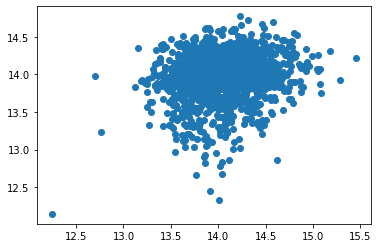

In [0]:
import matplotlib.pyplot as plt
plt.scatter(P_func,Prediction_by_training)

In [0]:
error_rate=abs(P_func-Prediction_by_training)
print(error_rate)
e=error_rate.mean()
print(e)

[[0.18764281 0.25984927 0.35674252 ... 0.20018537 0.74152585 0.34816731]
 [0.20595336 0.27815982 0.37505307 ... 0.21849592 0.7598364  0.36647786]
 [0.24756169 0.17535523 0.07846198 ... 0.23501914 0.30632134 0.0870372 ]
 ...
 [0.1425879  0.07038144 0.02651181 ... 0.13004534 0.41129514 0.0179366 ]
 [0.14400888 0.07180241 0.02509084 ... 0.13146632 0.40987416 0.01651562]
 [0.33018088 0.40238734 0.49928059 ... 0.34272344 0.88406392 0.49070538]]
0.36859845381090184


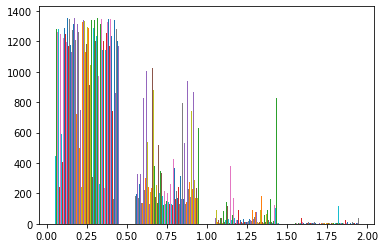

In [0]:
plt.hist(error_rate,bins=[0,0.5,1,1.5,2])
plt.show()

Even though our outputs for the trained model and the equation (function fun) does not match the mean error is 0.36 which is not very bad. In the above plot we can see that most of our error rate is between 0-1.5 which is small and less than 100 values that have error rate between 1.5-2. I will keep working on my function and the model to try and get the outputs closer to each other. 